# Compute song information retained in small population of neurons

In [1]:
%matplotlib inline
from itertools import product as cproduct
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import sys

from disp import set_plot


cc = np.concatenate

In [2]:
data = np.load('data/simple/compression/hs_greedy.npy', allow_pickle=True)[0]
hs_all = data['HS_ALL']
inrns_chosen = data['INRNS_CHOSEN']
hs_chosen = data['HS_CHOSEN']
tau_rs = data['TAU_R']
tau_as = data['TAU_A']
x_ss = data['X_S']
x_ps = data['X_P']
nbin = data['NBIN']
frs_keep = data['FRS']

max_nrns = len(inrns_chosen)

In [3]:
h_maxs = np.log2(nbin**(1+np.arange(max_nrns)))

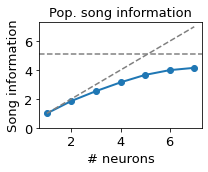

In [4]:
# plot max entropies vs number neurons
fig, ax = plt.subplots(1, 1, figsize=(3, 2.5), tight_layout=True)
ax.plot(1+np.arange(max_nrns), hs_chosen/h_maxs[0], lw=2)
ax.scatter(1+np.arange(max_nrns), hs_chosen/h_maxs[0])
ax.plot(1+np.arange(max_nrns), h_maxs/h_maxs[0], c='gray', ls='--')
ax.axhline(np.log2(len(frs_keep))/h_maxs[0], c='gray', ls='--')
ax.set_ylim(bottom=0)
set_plot(ax, x_label='# neurons', y_label=r'Song information', title='Pop. song information', font_size=13)
fig.savefig('ms/fig_3h.svg')

In [5]:
# print top neurons
for cnrn_chosen, inrn_chosen in enumerate(inrns_chosen):
    print(f'Neuron {inrn_chosen}')
    print(f'X_S = {x_ss[inrn_chosen]}, X_P = {1-x_ss[inrn_chosen]}')
    print(f'TAU_R = {tau_rs[inrn_chosen]}, TAU_A = {tau_as[inrn_chosen]}')
    print()

Neuron 206
X_S = 1.0, X_P = 0.0
TAU_R = 60.0, TAU_A = 10.0

Neuron 91
X_S = 0.5, X_P = 0.5
TAU_R = 2.0, TAU_A = 2.0

Neuron 270
X_S = 0.0, X_P = 1.0
TAU_R = 240.0, TAU_A = 0.1

Neuron 147
X_S = 0.0, X_P = 1.0
TAU_R = 10.0, TAU_A = 5.0

Neuron 57
X_S = 0.0, X_P = 1.0
TAU_R = 1.0, TAU_A = 0.5

Neuron 149
X_S = 1.0, X_P = 0.0
TAU_R = 10.0, TAU_A = 5.0

Neuron 108
X_S = 0.0, X_P = 1.0
TAU_R = 5.0, TAU_A = 0.1



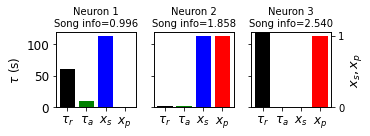

In [6]:
# make bar charts showing top neuron params
NPLOT = 3  #max_nrns

fig, axs = plt.subplots(1, NPLOT, figsize=(1.75*NPLOT, 2), tight_layout=True, sharey=True)
for cnrn, (inrn, ax) in enumerate(zip(inrns_chosen, axs)):
    mi = hs_chosen[cnrn]
    tau_r = tau_rs[inrn]
    tau_a = tau_as[inrn]
    x_s = x_ss[inrn]
    x_p = x_ps[inrn]

    ax.bar(range(2), [tau_r, tau_a], align='center', width=.8, color=['k', 'g'])
    ax_twin = ax.twinx()
    ax_twin.bar(range(2, 4), [x_s, x_p], align='center', width=.8, color=['b', 'r'])

    ax.set_xticks(range(4))
    
    if cnrn == 0:
        ax.set_ylabel(r'$\tau$ (s)')
    if cnrn == (NPLOT-1):
        ax_twin.set_yticks(range(2))
        ax_twin.set_ylabel(r'$x_s, x_p$', fontsize=13)
    else:
        ax_twin.set_yticks([])
    
    set_plot(
        ax, y_lim=(0, 120), x_ticks=range(4), x_tick_labels=[r'$\tau_r$', r'$\tau_a$', r'$x_s$', r'$x_p$'],
        font_size=12)
    ax.set_title(f'Neuron {cnrn+1}\n' + f'Song info={mi/h_maxs[0]:.3f}', fontsize=10)
    
fig.savefig('ms/fig_3i.svg')

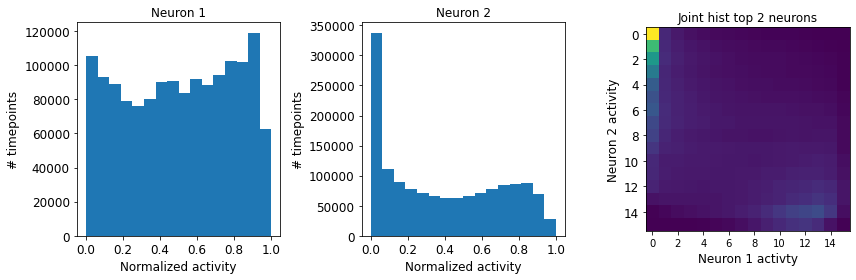

In [7]:
# joint response histogram of top two neurons
bins = np.linspace(0, 1, nbin+1)
fig, axs = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
axs[0].hist(frs_keep[:, 0], bins=bins)
axs[1].hist(frs_keep[:, 1], bins=bins)

for cnrn, ax in enumerate(axs[:2]):
    set_plot(ax, x_label='Normalized activity', y_label='# timepoints', title=f'Neuron {cnrn+1}', font_size=12)

cts = np.histogram2d(frs_keep[:, 0], frs_keep[:, 1], bins=2*[bins])[0]
cts = cts/cts.sum()

axs[2].matshow(cts)
set_plot(
    axs[2], x_label='Neuron 1 activty', y_label='Neuron 2 activity',
    title=f'Joint hist top 2 neurons', font_size=12)
axs[2].xaxis.tick_bottom()